## Q1. PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing

In [2]:
# importing dataset

data=pd.read_csv("C:/Users/Dhanashree/Downloads/forestfires.csv")
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


### Performing EDA & Visualization

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
# Descriptive Satistics

data.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [5]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
data1=data.copy()
data1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [7]:
data1[data1.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [8]:
data1["month"].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [9]:
data1["day"].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [10]:
# Checking Correlation between numerical function

data1=data[["month","day","FFMC","DMC","DC","ISI","temp","RH","wind","rain","area","size_category"]]
data1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [11]:
cor=data1.corr()
cor

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


<AxesSubplot:>

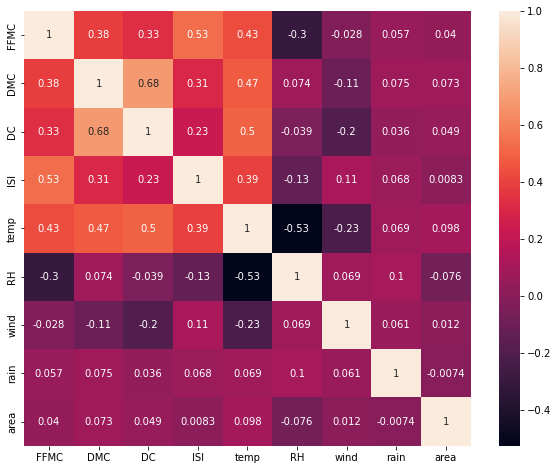

In [12]:
# creating heatmap by use of correlation

plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True)

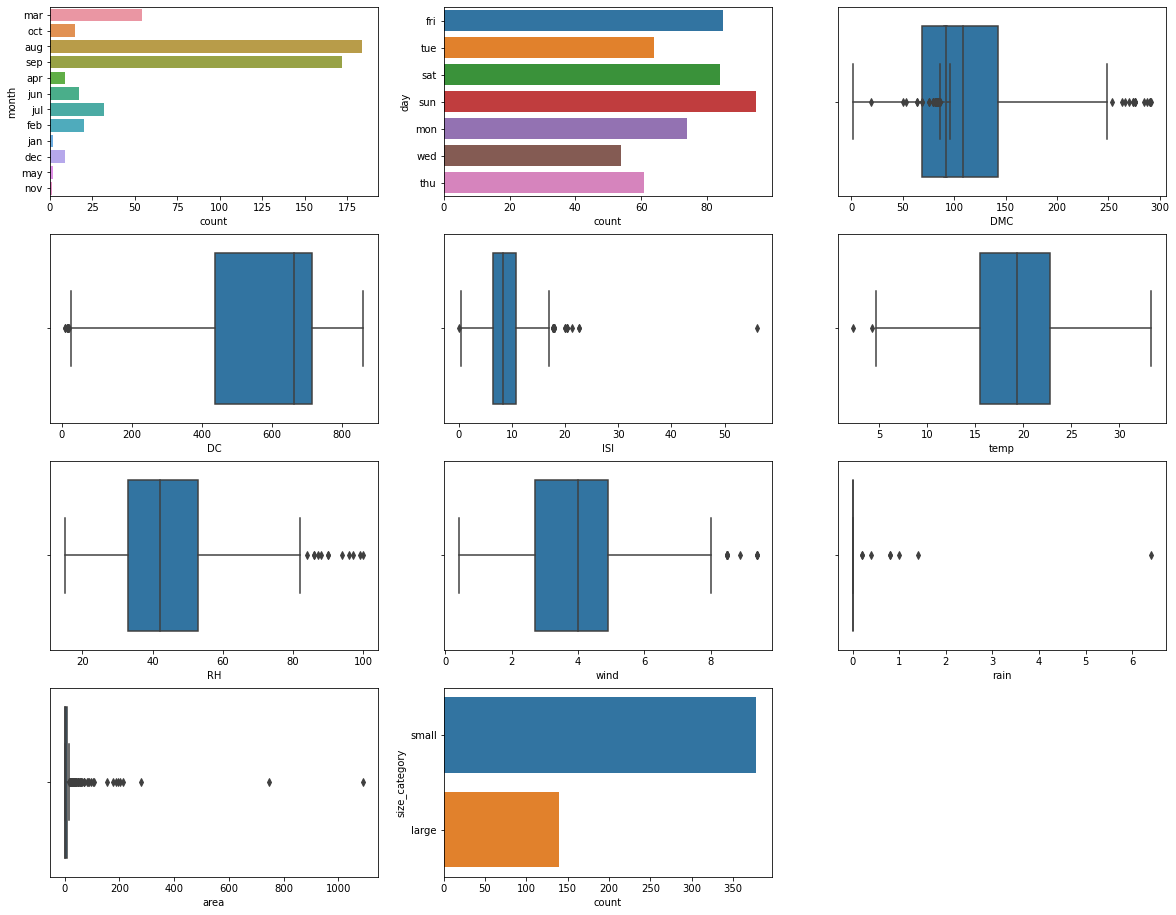

In [13]:
# Ploting Count plot

plt.subplots(figsize=(20,16))
[plt.subplot(4,3,1), sns.countplot(data=data1, y='month')];

[plt.subplot(4,3,2), sns.countplot(data=data1, y='day')];

[plt.subplot(4,3,3), sns.boxplot(x=data1["FFMC"])];

[plt.subplot(4,3,3), sns.boxplot(x=data1["DMC"])];

[plt.subplot(4,3,4), sns.boxplot(x=data1["DC"])];

[plt.subplot(4,3,5), sns.boxplot(x=data1["ISI"])];

[plt.subplot(4,3,6), sns.boxplot(x=data1["temp"])];

[plt.subplot(4,3,7), sns.boxplot(x=data1["RH"])];

[plt.subplot(4,3,8), sns.boxplot(x=data1["wind"])];

[plt.subplot(4,3,9), sns.boxplot(x=data1["rain"])];

[plt.subplot(4,3,10), sns.boxplot(x=data1["area"])]

[plt.subplot(4,3,11), sns.countplot(data=data1, y='size_category')];

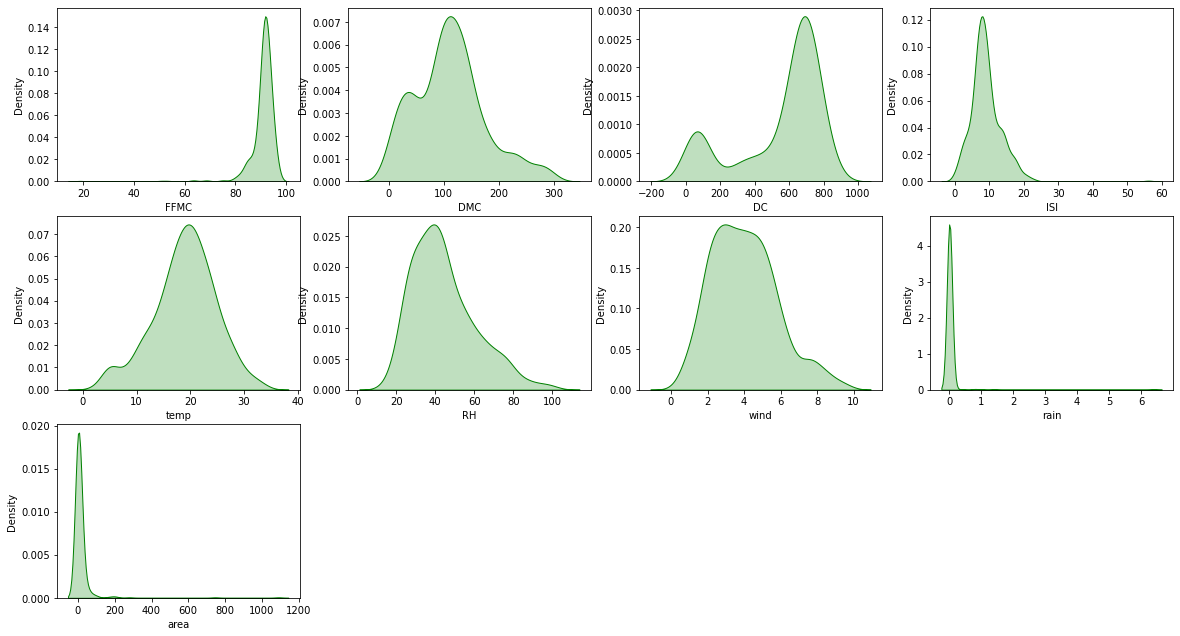

In [14]:
no_columns = data1.select_dtypes(exclude='object').columns.tolist()

plt.figure(figsize=(20,30))
for i,column in enumerate(no_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(data1[column],color='g',shade=True)

Text(0, 0.5, 'Rate')

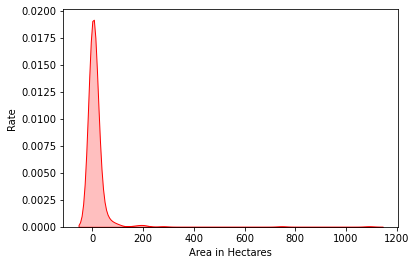

In [15]:
sns.kdeplot(data1['area'],shade=True,color='r')
plt.xlabel('Area in Hectares')
plt.ylabel('Rate')

([<AxesSubplot:title={'center':'v'}>,
  <AxesSubplot:title={'center':'v'}>,
  Text(0.5, 1.0, 'v')],
 [<AxesSubplot:xlabel='FFMC'>, <AxesSubplot:xlabel='FFMC'>])

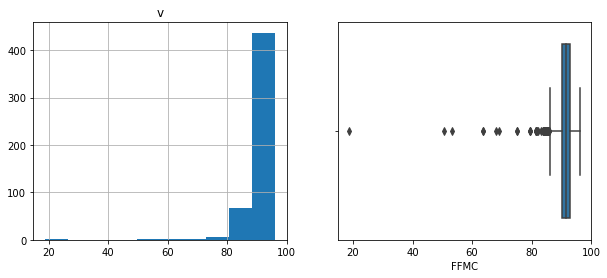

In [16]:
#Histogram And Boxplot

plt.subplots(figsize=(10, 4))
[plt.subplot(1,2,1),data1['FFMC'].hist(),plt.title("v")],[plt.subplot(1,2,2),sns.boxplot(x=data1["FFMC"])]

([<AxesSubplot:title={'center':'DMC'}>,
  <AxesSubplot:title={'center':'DMC'}>,
  Text(0.5, 1.0, 'DMC')],
 [<AxesSubplot:xlabel='DMC'>, <AxesSubplot:xlabel='DMC'>])

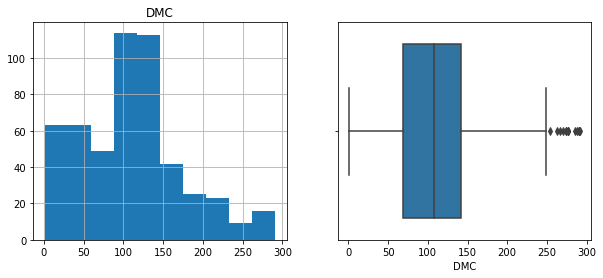

In [17]:
plt.subplots(figsize=(10, 4))
[plt.subplot(1,2,1),data1['DMC'].hist(),plt.title("DMC")],[plt.subplot(1,2,2),sns.boxplot(x=data1["DMC"])]

([<AxesSubplot:title={'center':'DC'}>,
  <AxesSubplot:title={'center':'DC'}>,
  Text(0.5, 1.0, 'DC')],
 [<AxesSubplot:xlabel='DC'>, <AxesSubplot:xlabel='DC'>])

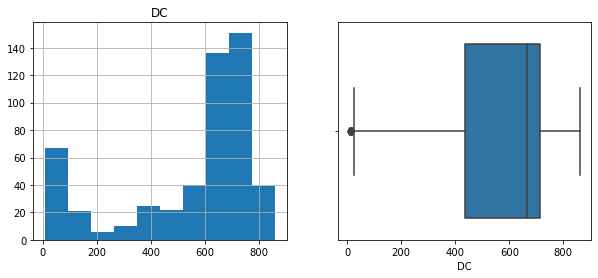

In [18]:
plt.subplots(figsize=(10, 4))
[plt.subplot(1,2,1),data1['DC'].hist(),plt.title("DC")],[plt.subplot(1,2,2),sns.boxplot(x=data1["DC"])]

([<AxesSubplot:title={'center':'ISI'}>,
  <AxesSubplot:title={'center':'ISI'}>,
  Text(0.5, 1.0, 'ISI')],
 [<AxesSubplot:xlabel='ISI'>, <AxesSubplot:xlabel='ISI'>])

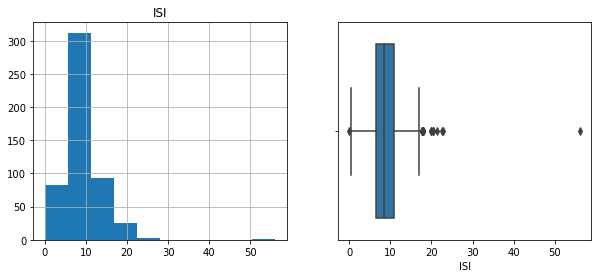

In [19]:
plt.subplots(figsize=(10, 4))
[plt.subplot(1,2,1),data1['ISI'].hist(),plt.title("ISI")],[plt.subplot(1,2,2),sns.boxplot(x=data1["ISI"])]

([<AxesSubplot:title={'center':'temp'}>,
  <AxesSubplot:title={'center':'temp'}>,
  Text(0.5, 1.0, 'temp')],
 [<AxesSubplot:xlabel='temp'>, <AxesSubplot:xlabel='temp'>])

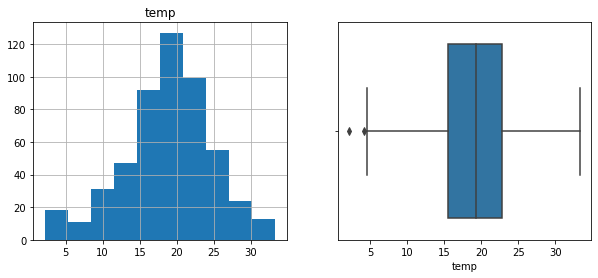

In [20]:
plt.subplots(figsize=(10, 4))
[plt.subplot(1,2,1),data1['temp'].hist(),plt.title("temp")],[plt.subplot(1,2,2),sns.boxplot(x=data1["temp"])]

([<AxesSubplot:title={'center':'RH'}>,
  <AxesSubplot:title={'center':'RH'}>,
  Text(0.5, 1.0, 'RH')],
 [<AxesSubplot:xlabel='RH'>, <AxesSubplot:xlabel='RH'>])

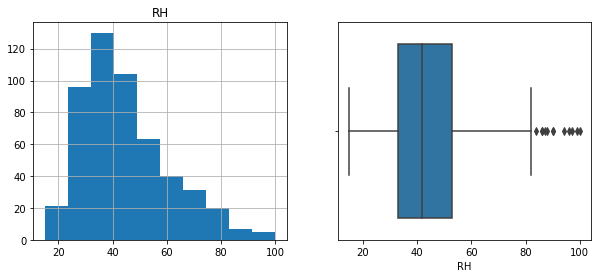

In [21]:
plt.subplots(figsize=(10, 4))
[plt.subplot(1,2,1),data1['RH'].hist(),plt.title("RH")],[plt.subplot(1,2,2),sns.boxplot(x=data1["RH"])]

([<AxesSubplot:title={'center':'wind'}>,
  <AxesSubplot:title={'center':'wind'}>,
  Text(0.5, 1.0, 'wind')],
 [<AxesSubplot:xlabel='wind'>, <AxesSubplot:xlabel='wind'>])

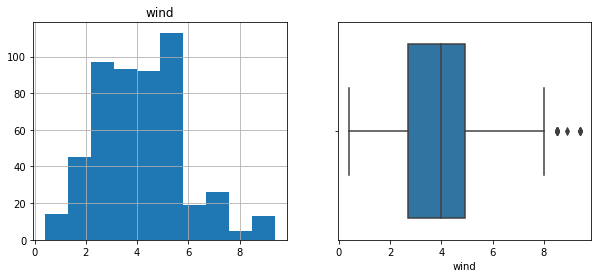

In [22]:
plt.subplots(figsize=(10, 4))
[plt.subplot(1,2,1),data1['wind'].hist(),plt.title("wind")],[plt.subplot(1,2,2),sns.boxplot(x=data1["wind"])]

([<AxesSubplot:title={'center':'rain'}>,
  <AxesSubplot:title={'center':'rain'}>,
  Text(0.5, 1.0, 'rain')],
 [<AxesSubplot:xlabel='rain'>, <AxesSubplot:xlabel='rain'>])

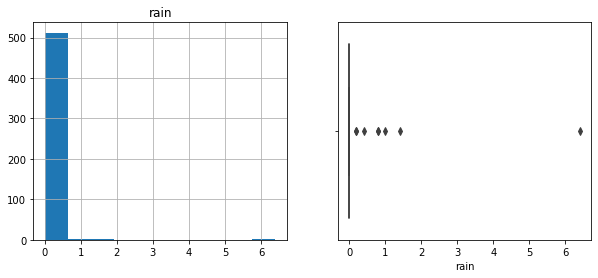

In [23]:
plt.subplots(figsize=(10, 4))
[plt.subplot(1,2,1),data1['rain'].hist(),plt.title("rain")],[plt.subplot(1,2,2),sns.boxplot(x=data1["rain"])]

([<AxesSubplot:title={'center':'area'}>,
  <AxesSubplot:title={'center':'area'}>,
  Text(0.5, 1.0, 'area')],
 [<AxesSubplot:xlabel='area'>, <AxesSubplot:xlabel='area'>])

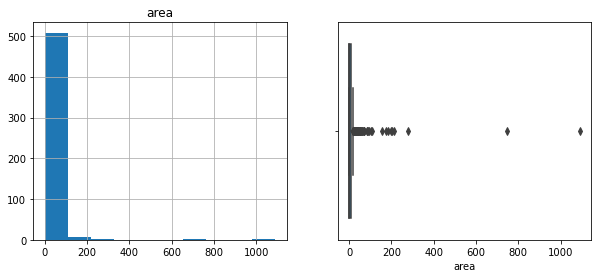

In [24]:
plt.subplots(figsize=(10, 4))
[plt.subplot(1,2,1),data1['area'].hist(),plt.title("area")],[plt.subplot(1,2,2),sns.boxplot(x=data1["area"])]

In [25]:
label_encoder=preprocessing.LabelEncoder()
data['size_category']=label_encoder.fit_transform(data['size_category'])
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


In [26]:
x = data.iloc[:,2:11]
y = data['size_category']
x,y

(     FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
 0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
 1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
 2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
 3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
 4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
 ..    ...    ...    ...   ...   ...  ..   ...   ...    ...
 512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
 513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
 514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
 515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
 516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00
 
 [517 rows x 9 columns],
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 512    0
 513    0
 514    0
 515    1
 516    1
 Name: size_category, Length: 517, dtype: int32)

In [27]:
# fix random seed for reproducibility
seed = 9
np.random.seed(seed)

In [28]:
# creating model with ["relu" and "sigmoid"]

model = Sequential() # 0 level
model.add(Dense(12, input_dim=9,  activation='relu')) #1st layer
model.add(Dense(8,  activation='relu')) #2nd layer
model.add(Dense(1, activation='sigmoid')) #3rd layer or op layer

In [29]:
# Compile model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model

In [30]:
# Fit the model

fil_model=model.fit(x, y, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
35/35 [==============================] - 2s 18ms/step - loss: 26.3156 - accuracy: 0.7601 - val_loss: 28.5953 - val_accuracy: 0.6725
Epoch 2/250
35/35 [==============================] - 0s 7ms/step - loss: 15.2817 - accuracy: 0.7370 - val_loss: 15.3307 - val_accuracy: 0.6433
Epoch 3/250
35/35 [==============================] - 0s 6ms/step - loss: 6.5691 - accuracy: 0.7601 - val_loss: 1.9858 - val_accuracy: 0.6257
Epoch 4/250
35/35 [==============================] - 0s 6ms/step - loss: 1.4213 - accuracy: 0.6936 - val_loss: 1.5332 - val_accuracy: 0.6316
Epoch 5/250
35/35 [==============================] - 0s 8ms/step - loss: 1.0129 - accuracy: 0.7457 - val_loss: 1.5255 - val_accuracy: 0.7544
Epoch 6/250
35/35 [==============================] - 0s 7ms/step - loss: 0.8732 - accuracy: 0.7572 - val_loss: 1.2365 - val_accuracy: 0.7135
Epoch 7/250
35/35 [==============================] - 0s 6ms/step - loss: 0.7427 - accuracy: 0.8035 - val_loss: 1.1210 - val_accuracy: 0.7719
Epoch 8/

In [31]:
# Evaluating the Model

score = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

17/17 [==============================] - 0s 4ms/step - loss: 0.0505 - accuracy: 0.9826
accuracy: 98.26%


In [32]:
model.metrics_names, score 

(['loss', 'accuracy'], [0.05053615942597389, 0.9825918674468994])

In [33]:
# Visualzation of Training History

fil_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

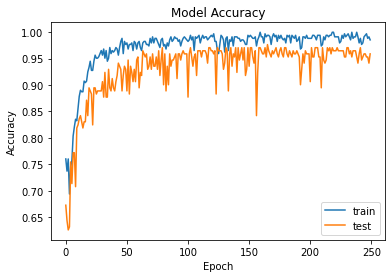

In [34]:
# summarizaion of history for accuracy

plt.plot(fil_model.history['accuracy'])
plt.plot(fil_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

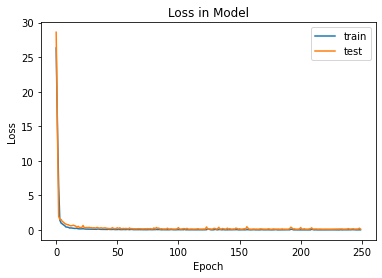

In [35]:
# summarization of history for 'loss'

plt.plot(fil_model.history['loss'])
plt.plot(fil_model.history['val_loss'])
plt.title('Loss in Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [36]:
predictions = model.predict(x)

17/17 [==============================] - 0s 3ms/step


### Making Another model with changing Activation functions and Mini-Batch Gradient(optimizer)

In [37]:
# fix random seed for reproducibility
seed2 = 9
np.random.seed(seed2)

In [38]:
# creating model with ["linear" and "sigmoid"]

model2 = Sequential() # 0 level
model2.add(Dense(14, input_dim=9,  activation='linear'))
model2.add(Dense(9,  activation='linear')) 
model2.add(Dense(1, activation='sigmoid'))

In [39]:
model2.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])
model2

In [40]:
fil_model2=model2.fit(x, y, validation_split=0.33, epochs=200, batch_size=10)

Epoch 1/200
35/35 [==============================] - 2s 28ms/step - loss: 99.4351 - accuracy: 0.7572 - val_loss: 146.1583 - val_accuracy: 0.6784
Epoch 2/200
35/35 [==============================] - 0s 6ms/step - loss: 99.3004 - accuracy: 0.7572 - val_loss: 145.9568 - val_accuracy: 0.6784
Epoch 3/200
35/35 [==============================] - 0s 7ms/step - loss: 99.1656 - accuracy: 0.7572 - val_loss: 145.7555 - val_accuracy: 0.6784
Epoch 4/200
35/35 [==============================] - 0s 7ms/step - loss: 99.0301 - accuracy: 0.7572 - val_loss: 145.5507 - val_accuracy: 0.6784
Epoch 5/200
35/35 [==============================] - 0s 5ms/step - loss: 98.8949 - accuracy: 0.7572 - val_loss: 145.3488 - val_accuracy: 0.6784
Epoch 6/200
35/35 [==============================] - 0s 6ms/step - loss: 98.7597 - accuracy: 0.7572 - val_loss: 145.1486 - val_accuracy: 0.6784
Epoch 7/200
35/35 [==============================] - 0s 7ms/step - loss: 98.6262 - accuracy: 0.7572 - val_loss: 144.9484 - val_accuracy

In [41]:
# Evaluating the Model

score2 = model2.evaluate(x, y)
print("%s: %.2f%%" % (model2.metrics_names[1], score2[1]*100))

17/17 [==============================] - 0s 3ms/step - loss: 84.3360 - accuracy: 0.7311
accuracy: 73.11%


In [42]:
# Visualzation of Training History, metric name and score

model2.metrics_names, score2 , fil_model2.history.keys()

(['loss', 'accuracy'],
 [84.33598327636719, 0.731141209602356],
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']))

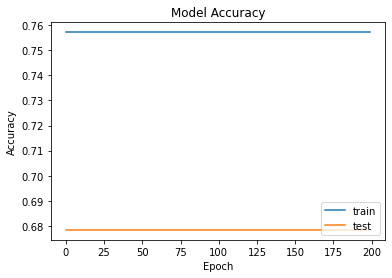

In [43]:
# summarizaion of history for accuracy

plt.plot(fil_model2.history['accuracy'])
plt.plot(fil_model2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

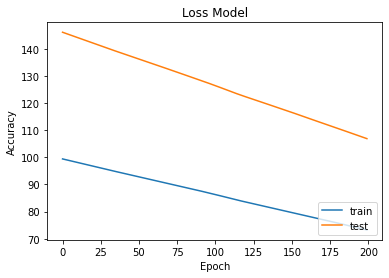

In [44]:
# summarizaion of history for loss

plt.plot(fil_model2.history['loss'])
plt.plot(fil_model2.history['val_loss'])
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

### Making Another model with changing Activation functions and Mini-Batch Gradient(optimizer)

In [45]:
# fix random seed for reproducibility
seed3 = 10
np.random.seed(seed3)

In [46]:
# creating model with ["sigmoid" and "logistic"]

model3 = Sequential() # 0 level
model3.add(Dense(14, input_dim=9,  activation='relu')) 
model3.add(Dense(9,  activation='sigmoid')) 
model3.add(Dense(1, activation='tanh'))

In [47]:
# Compile model
# chaging optimizer older=adadelta/ada, new=adagrad

model3.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])

In [48]:
# Fit the model
# Change ephocs

fil_model3=model3.fit(x, y, validation_split=0.33, epochs=300, batch_size=15)

Epoch 1/300
24/24 [==============================] - 2s 28ms/step - loss: 0.5579 - accuracy: 0.7601 - val_loss: 0.6403 - val_accuracy: 0.6842
Epoch 2/300
24/24 [==============================] - 0s 7ms/step - loss: 0.5558 - accuracy: 0.7601 - val_loss: 0.6385 - val_accuracy: 0.6842
Epoch 3/300
24/24 [==============================] - 0s 7ms/step - loss: 0.5547 - accuracy: 0.7601 - val_loss: 0.6371 - val_accuracy: 0.6842
Epoch 4/300
24/24 [==============================] - 0s 7ms/step - loss: 0.5538 - accuracy: 0.7601 - val_loss: 0.6358 - val_accuracy: 0.6842
Epoch 5/300
24/24 [==============================] - 0s 7ms/step - loss: 0.5529 - accuracy: 0.7601 - val_loss: 0.6358 - val_accuracy: 0.6842
Epoch 6/300
24/24 [==============================] - 0s 7ms/step - loss: 0.5525 - accuracy: 0.7601 - val_loss: 0.6362 - val_accuracy: 0.6842
Epoch 7/300
24/24 [==============================] - 0s 7ms/step - loss: 0.5524 - accuracy: 0.7601 - val_loss: 0.6362 - val_accuracy: 0.6842
Epoch 8/300


In [49]:
# Evaluating the Model

score3 = model3.evaluate(x, y)
print("%s: %.2f%%" % (model3.metrics_names[1], score3[1]*100))

17/17 [==============================] - 0s 3ms/step - loss: 0.5774 - accuracy: 0.7350
accuracy: 73.50%


In [50]:
# Visualzation of Training History, metric name and score

model3.metrics_names, score3 , fil_model3.history.keys()

(['loss', 'accuracy'],
 [0.5773976445198059, 0.7350096702575684],
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']))

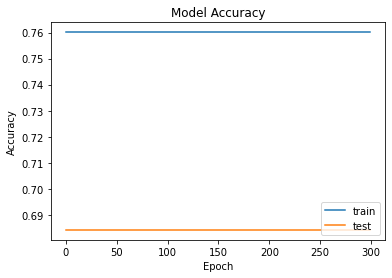

In [51]:
# summarizaion of history for accuracy

plt.plot(fil_model3.history['accuracy'])
plt.plot(fil_model3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

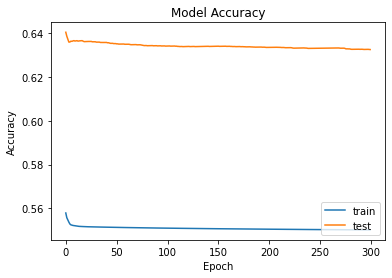

In [52]:
# summarizaion of history for loss

plt.plot(fil_model3.history['loss'])
plt.plot(fil_model3.history['val_loss'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [53]:
## As per calcluation "relu" activation function helping to increase accuracy